<a href="https://colab.research.google.com/github/Tann1901/About_me-Tann1901/blob/main/Udemy_course_analyzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA & LIBRARY IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
### Link of data: https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal

In [3]:
link='https://drive.google.com/file/d/1eS-gj-rSXuWOW7PrlThjz5FoNZ8yczsX/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df1 = pd.read_csv(path)

In [4]:
link='https://drive.google.com/file/d/1pRlCNpdRM9hByENEYc-E_lHiwkhgOmEU/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df2 = pd.read_csv(path)

In [5]:
link='https://drive.google.com/file/d/1oZADS_ZXie832OpmywyKvC3c3C5_0HJT/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df3 = pd.read_csv(path)

In [6]:
link='https://drive.google.com/file/d/1Q9NSJ9byhyLKaiKitWsgjjbKZml6_0k0/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df4 = pd.read_csv(path)

In [7]:
link='https://drive.google.com/file/d/1uTEWZtfd3Blaeuzbir1nWZOHadYSUdNx/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df5 = pd.read_csv(path)

In [8]:
# Concatenate vertically
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,rating,Date,Free/Paid
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,NaN,NaN,NaN
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,NaN,NaN,NaN
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,NaN,NaN,NaN
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,NaN,NaN,NaN
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,885413.0,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0.0,0.0,18.0,Beginner Level,NaN,2.0,2016-07-27T21:07:46Z,Business Finance,0.95,2016-07-27,Paid
7353,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,NaN,2.5,2017-06-28T21:55:29Z,Business Finance,0.95,2017-06-28,Paid
7354,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,NaN,1.0,2017-02-08T22:15:56Z,Business Finance,0.36,2017-02-08,Paid
7355,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,NaN,2.0,2017-06-29T23:20:10Z,Business Finance,0.15,2017-06-29,Paid


# DATA WRANGLING

## Check null

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            7352 non-null   float64
 1   course_title         7352 non-null   object 
 2   url                  7352 non-null   object 
 3   price                7352 non-null   float64
 4   num_subscribers      7352 non-null   float64
 5   num_reviews          7352 non-null   float64
 6   num_lectures         7352 non-null   float64
 7   level                7352 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     7352 non-null   float64
 10  published_timestamp  7352 non-null   object 
 11  subject              7353 non-null   object 
 12  rating               3676 non-null   float64
 13  Date                 3676 non-null   object 
 14  Free/Paid            3676 non-null   object 
dtypes: float64(8), object(7)
memory usage:

In [10]:
#change to Datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.isnull().sum()

course_id                 5
course_title              5
url                       5
price                     5
num_subscribers           5
num_reviews               5
num_lectures              5
level                     5
Rating                 3680
content_duration          5
published_timestamp       5
subject                   4
rating                 3681
Date                   3681
Free/Paid              3681
dtype: int64

In [12]:
# Rating and rating have values in either of each, so we merge values
df['RatingScore'] = np.where(df['rating'].notna(), df['rating'], df['Rating'])

# Drop the original 'rating' and 'Rating' columns if needed
df = df.drop(['rating', 'Rating'], axis=1)

In [13]:
#drop course_id is null
df = df.dropna(subset=['course_id'])

In [14]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Subject: Web Development', 'Web Development'], dtype=object)

In [15]:
#Change name of 'Subject: Web Development'
df['subject'] = df['subject'].replace('Subject: Web Development', 'Web Development')

In [16]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Date,Free/Paid,RatingScore
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,8.0,2013-04-20T02:25:22Z,Business Finance,NaT,NaN,0.56
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,1.5,2013-04-07T21:39:25Z,Business Finance,NaT,NaN,0.95
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,1.5,2013-12-25T19:53:34Z,Business Finance,NaT,NaN,0.91
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,1.5,2014-05-27T16:22:16Z,Business Finance,NaT,NaN,0.18
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,10.0,2016-01-21T01:38:48Z,Business Finance,NaT,NaN,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,885413.0,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0.0,0.0,18.0,Beginner Level,2.0,2016-07-27T21:07:46Z,Business Finance,2016-07-27,Paid,0.95
7353,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,2.5,2017-06-28T21:55:29Z,Business Finance,2017-06-28,Paid,0.95
7354,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,1.0,2017-02-08T22:15:56Z,Business Finance,2017-02-08,Paid,0.36
7355,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,2.0,2017-06-29T23:20:10Z,Business Finance,2017-06-29,Paid,0.15


In [17]:
#Fill null in Date by extracting from Timestamp
# extract the date from Timestamp for Null value in Date
df['Date'] = pd.to_datetime(df['published_timestamp'].str.split('T').str[0], format='%Y-%m-%d', errors='coerce')

# Use .loc to avoid SettingWithCopyWarning
df.loc[:, 'Date'] = pd.to_datetime(df['published_timestamp'].str.split('T').str[0], format='%Y-%m-%d', errors='coerce')

<ipython-input-17-7c483ad2deec>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df['published_timestamp'].str.split('T').str[0], format='%Y-%m-%d', errors='coerce')


In [18]:
#Fill null in Free/Paid by Free if price = 0
df['Free/Paid'] = df['Free/Paid'].fillna(df['price'].eq(0).map({True: 'Free', False: None}))

In [19]:
# #Fill null in Free/Paid by Paid if price > 0
df.loc[df['price'] > 0, 'Free/Paid'] = df['Free/Paid'].where(df['Free/Paid'] == 'Paid', 'Paid')

In [20]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
Date                   0
Free/Paid              0
RatingScore            0
dtype: int64

## Check duplicates

In [21]:
#count duplicates
duplicate = df.duplicated().sum()

In [22]:
df = df.drop_duplicates()

In [23]:
# Change data type
df['course_id'] = df['course_id'].astype(int)
df['num_subscribers']=df['num_subscribers'].astype(int)
df['num_reviews']=df['num_reviews'].astype(int)
df['num_lectures']=df['num_lectures'].astype(int)

<ipython-input-23-2bc44b56e1e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['course_id'] = df['course_id'].astype(int)
<ipython-input-23-2bc44b56e1e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_subscribers']=df['num_subscribers'].astype(int)
<ipython-input-23-2bc44b56e1e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [24]:
df.head(10)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Date,Free/Paid,RatingScore
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,0.56
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,0.95
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,1.5,2013-12-25T19:53:34Z,Business Finance,2013-12-25,Free,0.91
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.5,2014-05-27T16:22:16Z,Business Finance,2014-05-27,Free,0.18
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,10.0,2016-01-21T01:38:48Z,Business Finance,2016-01-21,Paid,0.37
5,97338,Forex Basics,https://www.udemy.com/forex-basics/,0.0,22344,712,26,All Levels,3.5,2013-10-16T17:40:23Z,Business Finance,2013-10-16,Free,0.89
6,321410,Beginner to Pro in Excel: Financial Modeling a...,https://www.udemy.com/beginner-to-pro-in-excel...,195.0,22257,2697,138,Intermediate Level,7.5,2014-11-25T23:00:40Z,Business Finance,2014-11-25,Paid,0.13
7,301442,Black Algo Trading: Build Your Trading Robot,https://www.udemy.com/build-your-trading-robot/,200.0,20195,1113,227,All Levels,16.0,2014-10-27T22:01:36Z,Business Finance,2014-10-27,Paid,0.21
8,189160,Financial Analysis: A Recipe for Success,https://www.udemy.com/financial-analysis-a-rec...,0.0,19614,635,14,All Levels,1.5,2014-04-23T15:10:52Z,Business Finance,2014-04-23,Free,0.30
9,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,0.0,19339,794,9,All Levels,2.0,2014-03-31T21:35:06Z,Business Finance,2014-03-31,Free,0.89


# ANALYZATION

## Visualization

### Subject Distribution by Level

<Figure size 800x800 with 0 Axes>

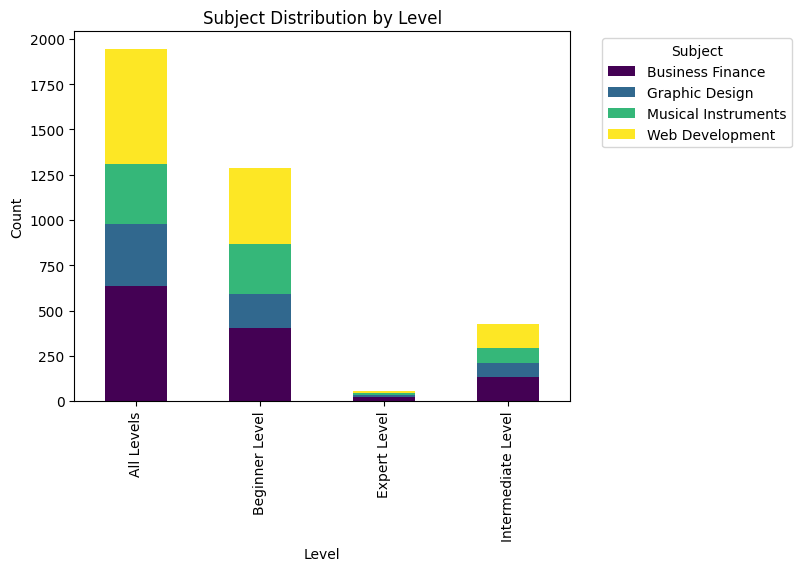

In [25]:
# Create a bar chart
plt.figure(figsize=(8, 8))

# Count the occurrences of each subject for each level
df_counts = df.groupby(['level', 'subject']).size().unstack()

# Plot the bar chart
df_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Subject Distribution by Level')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Table of level subject

In [26]:
# Create a frequency table (crosstab)
table_level_subject = pd.crosstab(df['level'], df['subject'])
table_level_subject

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
All Levels,636,342,333,633
Beginner Level,402,188,275,424
Expert Level,25,7,12,14
Intermediate Level,135,76,80,134


### Distribution of Free/Paid by Subject

<Figure size 800x800 with 0 Axes>

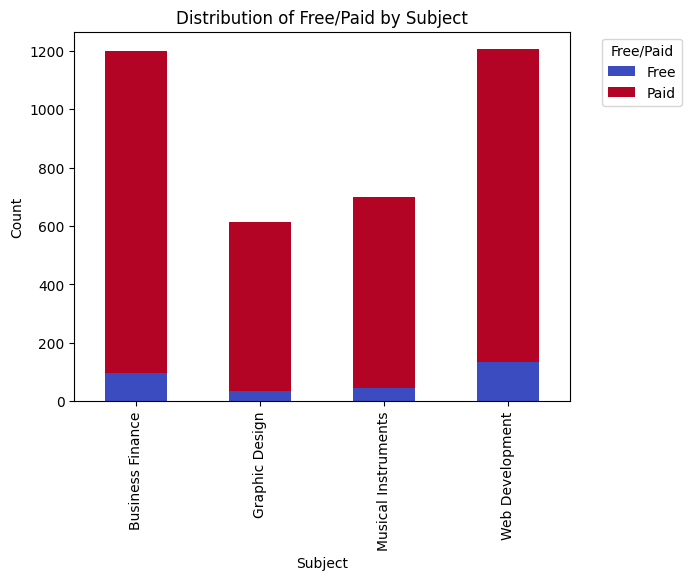

In [27]:
# Create a bar chart
plt.figure(figsize=(8, 8))

# Count the occurrences of each 'Free/Paid' for each 'subject'
df_counts = df.groupby(['subject', 'Free/Paid']).size().unstack()

# Plot the bar chart
df_counts.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Distribution of Free/Paid by Subject')
plt.legend(title='Free/Paid', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Table of Price and Subject

In [28]:
# Create a frequency table (crosstab)
table_price_subject = pd.crosstab(df['Free/Paid'], df['subject'])
table_price_subject

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
Free/Paid,,,,
Free,96,35,46,134
Paid,1102,578,654,1071


### Bar chart of Free and Paid proportion

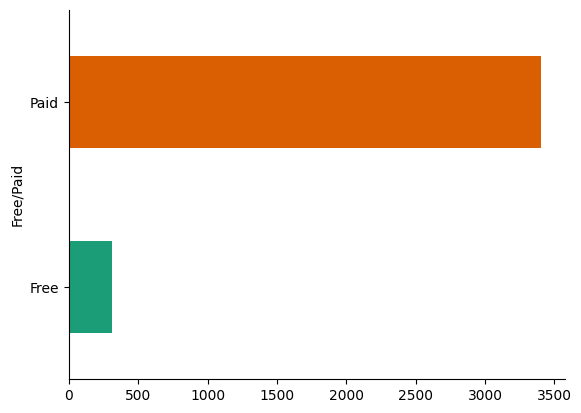

In [29]:
df.groupby('Free/Paid').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Scatterplot correation between number of lectures and number of reviews

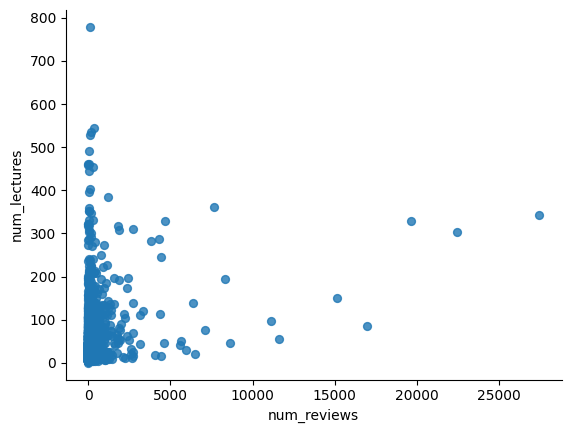

In [30]:
df.plot(kind='scatter', x='num_reviews', y='num_lectures', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Subjects Visualization

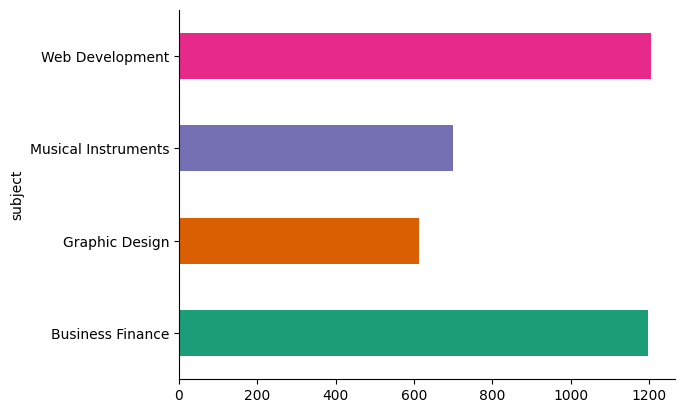

In [31]:
df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Top selling course

In [32]:
top_10_selling_course = df.sort_values(by='num_subscribers', ascending=False).iloc[0:10]
top_10_selling_course

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Date,Free/Paid,RatingScore
2476,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923,8629,45,Beginner Level,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free,0.82
2477,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029,279,27,Expert Level,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free,0.69
2478,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584,27445,342,Beginner Level,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid,0.89
2479,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291,5924,30,All Levels,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free,0.78
2480,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512,22412,304,Beginner Level,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid,0.55
1796,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,0.0,101154,1042,95,All Levels,4.5,2012-06-15T17:00:33Z,Musical Instruments,2012-06-15,Free,0.88
2481,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,0.0,98867,6512,20,All Levels,3.0,2015-04-13T18:29:47Z,Web Development,2015-04-13,Free,0.82
2482,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,30.0,84897,2685,10,All Levels,2.0,2013-10-10T15:19:29Z,Web Development,2013-10-10,Paid,0.79
2483,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,0.0,83737,4598,45,Intermediate Level,6.5,2014-07-19T03:02:05Z,Web Development,2014-07-19,Free,0.85
2484,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,175.0,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development,2015-03-12,Paid,0.69


We can see that the top 10 selling courses are majority in Web Development

# MACHINE LEARNING MODEL

## Overview

PART 1: FREE/PAID PREDICTION
- Purpose: Pricing Strategy, Revenue Analysis, Marketing, User Segmentation
- Strategy: Apply Classification to define Free/Paid courses
- Model Use:
  + Logistic Regression
  + Random Forest
  + SVM
- Variables Selected:
  + Number of Lectures
  + Level
  + Content Duration
  + Subject
  + Timestamp / Date

## FREE/PAID PREDICTION


### Data Handling

In [33]:
df1 = df.copy()

In [34]:
df1.dtypes

course_id                       int64
course_title                   object
url                            object
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration              float64
published_timestamp            object
subject                        object
Date                   datetime64[ns]
Free/Paid                      object
RatingScore                   float64
dtype: object

In [35]:
# Encoding Free/Paid
df1['Free/Paid'] = df1['Free/Paid'].map({'Free': 0, 'Paid': 1})

In [36]:
# Encoding level

label_encoder = LabelEncoder()
df1['Level_Encoded'] = label_encoder.fit_transform(df1['level'])

In [37]:
# Encoding subject
df1['Subject_Encoded'] = label_encoder.fit_transform(df1['subject'])

In [38]:
df1.dtypes

course_id                       int64
course_title                   object
url                            object
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration              float64
published_timestamp            object
subject                        object
Date                   datetime64[ns]
Free/Paid                       int64
RatingScore                   float64
Level_Encoded                   int64
Subject_Encoded                 int64
dtype: object

In [39]:
# Drop before_encoded columns and unecessary columns
df1.drop(['subject', 'level','published_timestamp','url','course_title'], axis=1, inplace=True)

In [40]:
df1.columns

Index(['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'content_duration', 'Date', 'Free/Paid', 'RatingScore', 'Level_Encoded',
       'Subject_Encoded'],
      dtype='object')

In [41]:
# Assuming X contains the feature variables and y contains the target variable
X = df1.drop(['Free/Paid','Date'], axis=1)
y = df1['Free/Paid']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Logistic Regression

In [42]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_lr = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the evaluation metrics
print("Logistic Regression Evaluation Report")
print("Accuracy :", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Logistic Regression Evaluation Report
Accuracy : 0.9986550100874243
Precision: 1.0
Recall: 0.9985358711566618
F1 Score: 0.9992673992673992


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


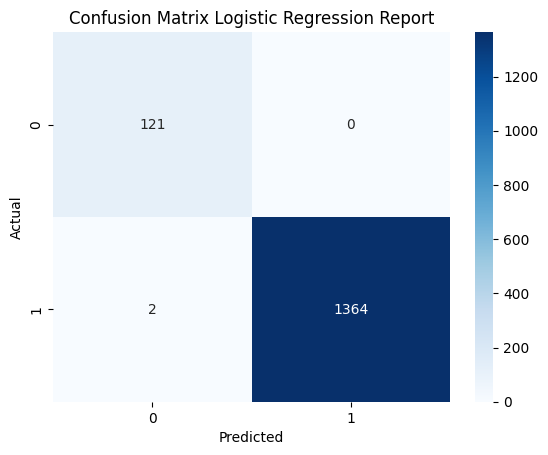

In [43]:
# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Report')
plt.show()

### Random Forest

In [44]:
# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Evaluation Report")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Evaluation Report
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


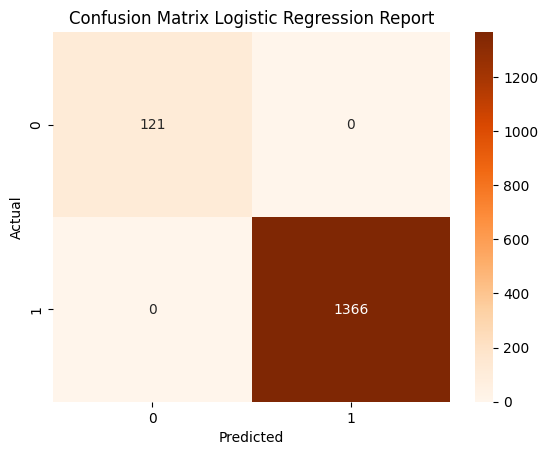

In [45]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Report')
plt.show()

### SVM

In [47]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM classifier
svm = SVC(kernel='rbf', random_state=1)
svm.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred_svm = svm.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the evaluation metrics
print("Support Vector Machine Evaluation Report")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Support Vector Machine Evaluation Report
Accuracy: 0.9899125756556826
Precision: 0.9927060539752006
Recall: 0.9963396778916545
F1 Score: 0.9945195469492144


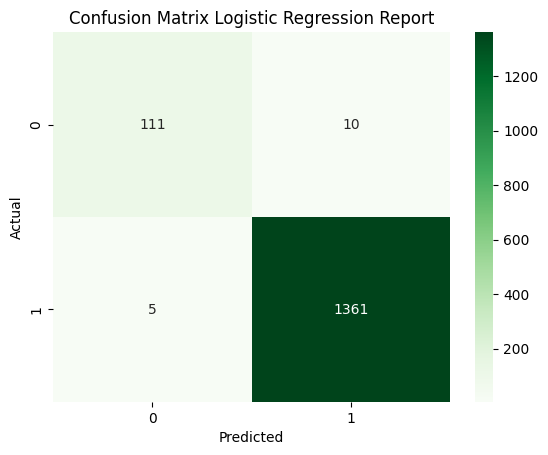

In [48]:
# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_svm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Report')
plt.show()

### Conclusion

Random Forest shown to be the most accurate model among three: Logistic Regression, Random Forest, SVM